In [165]:
import sympy as sp

In [166]:
F = 10
EI = 20e3
L = 3

In [167]:
w = F * L ** 3 / (3 * EI)
display(w)

0.0045

In [168]:
x, C1, C2, C3, C4, F, u0= sp.symbols('x, C1, C2, C3, C4, F, u0')

In [169]:
w = C1*x**3+C2*x**2+C3*x + C4

{C1: -0.0185185185185185*u0, C2: 0.166666666666667*u0, C3: 0.0, C4: 0.0}

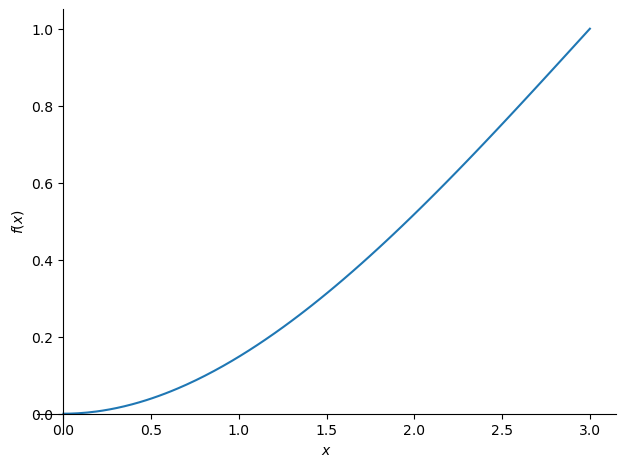

-u0*x**3/54 + u0*x**2/6

10000*u0**2/9

9/2000

0.00450000000000000

In [170]:
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.diff(x).subs(x,0),0)
eq3 = sp.Eq((-w.diff(x,2)*EI).subs(x,L),0)
eq4 = sp.Eq(w.subs(x,L),u0)
sol = sp.solve((eq1, eq2,eq3,eq4),(C1,C2,C3,C4))
display(sol)
w_sol = sp.nsimplify(w.subs(sol))
#w_sol = u0*sp.sin(x/12*2*sp.pi-sp.pi/2)+u0
#w_sol = 2*u0*(sp.cosh(x/sp.pi))-2*u0
sp.plot(w_sol.subs(u0,1),(x,0,3))
display(w_sol)
w_numpy = sp.lambdify((u0,x),w_sol)

M_sol = sp.nsimplify(EI * w_sol.diff(x,2))

Ev = sp.integrate(sp.nsimplify(M_sol**2/(EI*2)),(x,0,3))
display(Ev)

Ev_numpy = sp.lambdify(u0,Ev)

V = Ev - 10 * u0
V_numpy = sp.lambdify(u0,V)

display(sp.solve(sp.Eq(sp.diff(V,u0),0),u0)[0])
display(sp.solve(sp.Eq(sp.diff(V,u0),0),u0)[0].evalf())

In [171]:
import imageio
import matplotlib.pylab as plt
import numpy as np

In [172]:
def create_frame(i):
    u = 0.0045/201*i
    u = 0.0045 - 0.006 * np.e**(- u * 800)* np.cos(2 * np.pi* u / 0.045 * 40)
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))

    x = np.linspace(0,3,100)
    axs[0,0].plot(x,w_numpy(u,x))
    axs[0,0].set_xlim([-0.2,3.2])
    axs[0,0].set_ylim([-0.003,0.01])
    axs[0,0].invert_yaxis()
    axs[0,0].annotate(text='', xy=(3,w_numpy(u,3)), xytext=(3,0), arrowprops=dict(arrowstyle='fancy'))
    axs[0,0].text(3.1,w_numpy(u,3),'$u_0$')
    axs[0,0].axis('off')
    axs[0,1].axis('off')
    axs[0,1].set_xlim([-0.2,3.2])
    axs[0,1].set_ylim([-0.003,0.01])
    axs[0,1].annotate(text='', xy=(1.5,w_numpy(u,3)), xytext=(1.5,w_numpy(u,3)-0.003), arrowprops=dict(arrowstyle='simple'))
    axs[0,1].invert_yaxis()
    x_axis= ['$E_v$','$A_F$','$E_v - A_F$']
    y_axis = [Ev_numpy(u),w_numpy(u,3)*10,Ev_numpy(u)-w_numpy(u,3)*10]
    axs[1,0].bar(x_axis,y_axis,color=('blue','green','orange'))
    axs[1,0].set_ylim([-0.03,0.1])
    axs[1,0].set_yticklabels([])
    axs[1,0].set_yticks([])
    
    u_range=np.linspace(-0.0015,0.01,100)
    axs[1,1].plot(u_range,Ev_numpy(u_range),label='$E_v$',color='blue')
    axs[1,1].plot(u_range,w_numpy(u_range,3)*10,label='$F_A$',color='green')
    axs[1,1].plot(u_range,V_numpy(u_range),label='$E_v - A_F$',color='orange')
    axs[1,1].legend()
    axs[1,1].plot(u,Ev_numpy(u),'o',color='blue')
    axs[1,1].plot(u,w_numpy(u,3)*10,'o',color='green')
    axs[1,1].plot(u,Ev_numpy(u)-w_numpy(u,3)*10,'o',color='orange')
    axs[1,1].set_ylim([-0.03,0.1])
    axs[1,1].set_xlim([-0.0015,0.01])
    axs[1,1].set_xlabel('$u_0$')
    axs[1,1].set_xticks([])
    axs[1,1].set_xticklabels([])
    axs[1,1].set_yticks([])
    #plt.savefig(f'img_{i}.png',transparent = False,facecolor = 'white')
    #plt.close()


In [146]:
for i in range(201):
    create_frame(i)

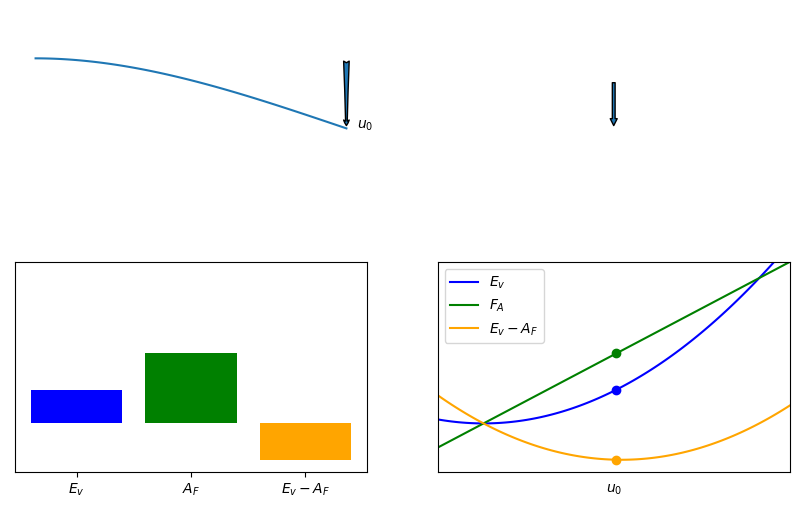

In [173]:
create_frame(201)

[]

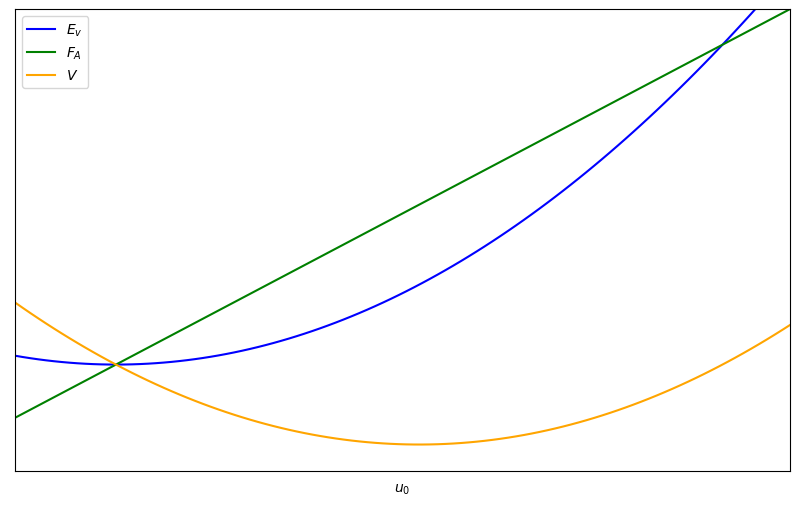

In [176]:
i = 400
u = 0.0045/201*i
u = 0.0045 - 0.006 * np.e**(- u * 800)* np.cos(2 * np.pi* u / 0.045 * 40)
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
u_range=np.linspace(-0.0015,0.01,100)
axs.plot(u_range,Ev_numpy(u_range),label='$E_v$',color='blue')
axs.plot(u_range,w_numpy(u_range,3)*10,label='$F_A$',color='green')
axs.plot(u_range,V_numpy(u_range),label='$V$',color='orange')
axs.legend()
#axs.plot(u,Ev_numpy(u),'o',color='blue')
#axs.plot(u,w_numpy(u,3)*10,'o',color='green')
#axs.plot(u,Ev_numpy(u)-w_numpy(u,3)*10,'o',color='orange')
axs.set_ylim([-0.03,0.1])
axs.set_xlim([-0.0015,0.01])
axs.set_xlabel('$u_0$')
axs.set_xticks([])
axs.set_xticklabels([])
axs.set_yticks([])

In [147]:
frames = []
for t in range(201):
    image = imageio.v2.imread(f'img_{t}.png')
    frames.append(image)

In [148]:
imageio.mimsave('./example.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second

10000*u0**2/9 - 10*u0

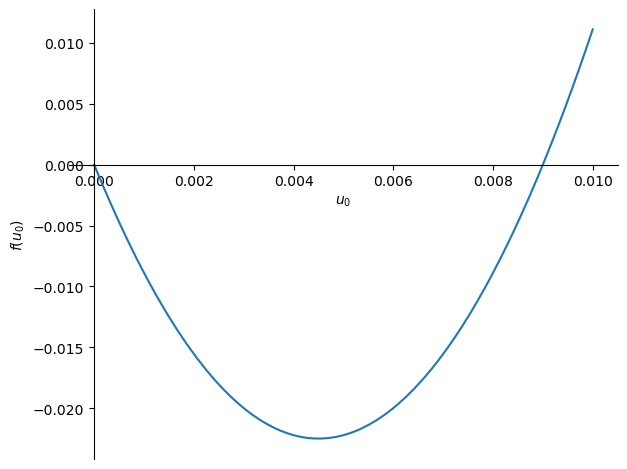

In [39]:
V = Ev - 10 * u0
display(V)
sp.plot(V,(u0,0,0.01))

In [41]:
u0, u1 = sp.symbols('u1, u2')

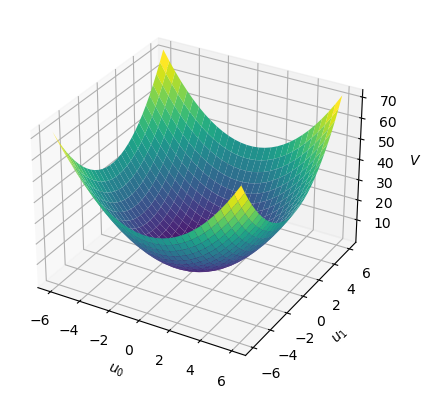

In [162]:
def f(x, y):
    return x**2+y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('$u_0$')
ax.set_ylabel('$u_1$')
ax.set_zlabel('$V$');